# 📊 Superstore Business Intelligence Report

## Executive Summary
This comprehensive analysis explores the **Superstore Sales Dataset** to provide actionable business intelligence. We go beyond simple data visualization to understand the underlying drivers of revenue, profitability, and operational efficiency.

### 🎯 Strategic Objectives
1. **Revenue Optimization**: Identify high-value products and regions to focus marketing efforts.
2. **Profitability Analysis**: Uncover which categories are truly profitable versus those that just generate high volume.
3. **Discount Strategy Evaluation**: Determine if current discounting practices are eroding profit or driving sustainable growth.
4. **Operational Insights**: Analyze demand patterns to inform inventory and supply chain decisions.

---

## 1. Import Libraries and Setup

Importing necessary Python libraries for data analysis and visualization.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## 2. Data Loading

Loading the Superstore dataset from the CSV file.

In [4]:
df = pd.read_csv("Data/Sample - Superstore.csv", encoding='ISO-8859-1')

## 3. Data Overview

Examining the structure and basic information about the dataset.

### 💡 Business Context
The dataset contains over **9,000 transactions** spanning several years. Each record provides a granular look at a single order, including customer demographics, product details, and financial metrics. Understanding this structure is crucial for interpreting the subsequent analysis.

In [5]:
# Display first few rows
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

## 4. Data Preprocessing

Converting date columns to datetime format and checking for missing values.

In [7]:
df[['Ship Date', 'Order Date']] = df[['Ship Date', 'Order Date']].apply(pd.to_datetime)

In [8]:
print(f"Total missing values: {df.isna().sum().sum()}")

Total missing values: 0


In [9]:
print(f"Number of unique products: {df['Product Name'].nunique()}")

Number of unique products: 1850


## 5. Revenue Drivers: Top Products Analysis

Identifying our 'Star' products is essential for inventory prioritization and premium marketing. This section highlights the top 15 products that contribute most significantly to our top-line revenue.

In [ ]:
# Group by product name and calculate total sales, then get top 15
top_product_sales = df.groupby('Product Name', as_index=False)['Sales'].sum().sort_values(by='Sales', ascending=False).head(15).sort_values(by='Sales')

# Create horizontal bar chart
fig = px.bar(top_product_sales, x='Sales', y='Product Name', orientation='h', 
             title='Top 15 Products by Sales', color='Sales', color_continuous_scale='agsunset')
fig.update_layout(width=1760, height=900)
fig.show()

### 🔍 Insight: The Pareto Principle in Action
Often, a small percentage of products (the 'Vital Few') drive the majority of revenue. By focusing on these top 15 products, management can ensure high availability and optimized shipping routes for our most valuable inventory.

## 6. Temporal Dynamics: Sales & Profit Trends

Business isn't static. By analyzing sales over time, we can identify **seasonality**, **growth trends**, and **anomalous events**. This is critical for financial forecasting and resource planning.

In [ ]:
# Aggregate sales and profit by order date
daily_sales = df.groupby('Order Date')[['Profit', 'Sales']].sum().reset_index()

# Create line chart for sales and profit over time
px.line(daily_sales, x='Order Date', y=['Profit', 'Sales'], title='Sales & Profit Over Time', color_discrete_map={'Profit':'red','Sales':'blue'})

### 📈 Trend Interpretation
- **Volatility**: Notice the high frequency of spikes. This suggests a business driven by large, individual orders or specific promotional events.
- **Profit Correlation**: Observe how closely the red (Profit) line follows the blue (Sales) line. Divergence here would indicate rising costs or aggressive discounting.

### Key Date Observations

Examining specific dates that may have unusual patterns:

In [12]:
# Check transactions on specific dates
print("Transactions on 18/3/2014:")
display(df[df['Order Date'] == '18/3/2014'])

print("\nTransactions on 26/7/2014:")
display(df[df['Order Date'] == '26/7/2014'])

print("\nTransactions on 25/11/2016:")
display(df[df['Order Date'] == '25/11/2016'])

Transactions on 18/3/2014:


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
2696,2697,CA-2014-145317,2014-03-18,2014-03-23,Standard Class,SM-20320,Sean Miller,Home Office,United States,Jacksonville,...,32216,South,TEC-MA-10003626,Technology,Machines,Hewlett-Packard Deskjet 6540 Color Inkjet Printer,821.300,4,0.50,-16.4260
2697,2698,CA-2014-145317,2014-03-18,2014-03-23,Standard Class,SM-20320,Sean Miller,Home Office,United States,Jacksonville,...,32216,South,TEC-MA-10002412,Technology,Machines,Cisco TelePresence System EX90 Videoconferenci...,22638.480,6,0.50,-1811.0784
2698,2699,CA-2014-145317,2014-03-18,2014-03-23,Standard Class,SM-20320,Sean Miller,Home Office,United States,Jacksonville,...,32216,South,OFF-PA-10001804,Office Supplies,Paper,Xerox 195,21.376,4,0.20,7.4816
2699,2700,CA-2014-145317,2014-03-18,2014-03-23,Standard Class,SM-20320,Sean Miller,Home Office,United States,Jacksonville,...,32216,South,OFF-AR-10003183,Office Supplies,Art,Avery Fluorescent Highlighter Four-Color Set,8.016,3,0.20,1.0020
2700,2701,CA-2014-145317,2014-03-18,2014-03-23,Standard Class,SM-20320,Sean Miller,Home Office,United States,Jacksonville,...,32216,South,FUR-FU-10004270,Furniture,Furnishings,"Executive Impressions 13"" Clairmont Wall Clock",30.768,2,0.20,8.0766
2701,2702,CA-2014-145317,2014-03-18,2014-03-23,Standard Class,SM-20320,Sean Miller,Home Office,United States,Jacksonville,...,32216,South,OFF-FA-10003112,Office Supplies,Fasteners,Staples,18.936,3,0.20,5.9175
2702,2703,CA-2014-145317,2014-03-18,2014-03-23,Standard Class,SM-20320,Sean Miller,Home Office,United States,Jacksonville,...,32216,South,FUR-FU-10001986,Furniture,Furnishings,"Dana Fluorescent Magnifying Lamp, White, 36""",122.352,3,0.20,15.2940
6151,6152,CA-2014-111871,2014-03-18,2014-03-21,Second Class,EK-13795,Eileen Kiefer,Home Office,United States,San Francisco,...,94110,West,FUR-BO-10004218,Furniture,Bookcases,Bush Heritage Pine Collection 5-Shelf Bookcase...,1198.330,10,0.15,70.4900
7327,7328,US-2014-131275,2014-03-18,2014-03-24,Standard Class,SC-20050,Sample Company A,Home Office,United States,Burbank,...,91505,West,FUR-FU-10004597,Furniture,Furnishings,Eldon Cleatmat Chair Mats for Medium Pile Carpets,111.000,2,0.00,14.4300
7328,7329,US-2014-131275,2014-03-18,2014-03-24,Standard Class,SC-20050,Sample Company A,Home Office,United States,Burbank,...,91505,West,TEC-MA-10001148,Technology,Machines,Swingline SM12-08 MicroCut Jam Free Shredder,1279.968,4,0.20,415.9896



Transactions on 26/7/2014:


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
2343,2344,US-2014-155894,2014-07-26,2014-07-30,Second Class,CL-11890,Carl Ludwig,Consumer,United States,Chicago,...,60623,Central,OFF-ST-10004804,Office Supplies,Storage,"Belkin 19"" Vented Equipment Shelf, Black",123.552,3,0.2,-29.3436
3837,3838,CA-2014-126760,2014-07-26,2014-08-02,Standard Class,KM-16720,Kunst Miller,Consumer,United States,North Las Vegas,...,89031,West,TEC-PH-10001363,Technology,Phones,Apple iPhone 5S,911.984,2,0.2,113.9980
3838,3839,CA-2014-126760,2014-07-26,2014-08-02,Standard Class,KM-16720,Kunst Miller,Consumer,United States,North Las Vegas,...,89031,West,FUR-CH-10003312,Furniture,Chairs,Hon 2090 Pillow Soft Series Mid Back Swivel/...,674.352,3,0.2,-109.5822
3839,3840,CA-2014-126760,2014-07-26,2014-08-02,Standard Class,KM-16720,Kunst Miller,Consumer,United States,North Las Vegas,...,89031,West,FUR-FU-10004018,Furniture,Furnishings,Tensor Computer Mounted Lamp,134.010,9,0.0,36.1827
3840,3841,CA-2014-126760,2014-07-26,2014-08-02,Standard Class,KM-16720,Kunst Miller,Consumer,United States,North Las Vegas,...,89031,West,TEC-AC-10004814,Technology,Accessories,Logitech Illuminated Ultrathin Keyboard with B...,170.970,3,0.0,70.0977
6422,6423,CA-2014-159121,2014-07-26,2014-08-01,Standard Class,JO-15145,Jack O'Briant,Corporate,United States,Draper,...,84020,West,TEC-AC-10002006,Technology,Accessories,Memorex Micro Travel Drive 16 GB,111.930,7,0.0,34.6983
7340,7341,CA-2014-116190,2014-07-26,2014-08-01,Standard Class,SG-20470,Sheri Gordon,Consumer,United States,Atlanta,...,30318,South,FUR-CH-10000553,Furniture,Chairs,"Metal Folding Chairs, Beige, 4/Carton",67.880,2,0.0,18.3276
7341,7342,CA-2014-116190,2014-07-26,2014-08-01,Standard Class,SG-20470,Sheri Gordon,Consumer,United States,Atlanta,...,30318,South,OFF-LA-10002762,Office Supplies,Labels,Avery 485,162.890,13,0.0,76.5583
7342,7343,CA-2014-116190,2014-07-26,2014-08-01,Standard Class,SG-20470,Sheri Gordon,Consumer,United States,Atlanta,...,30318,South,FUR-FU-10000719,Furniture,Furnishings,"DAX Cubicle Frames, 8-1/2 x 11",25.710,3,0.0,9.2556
9774,9775,CA-2014-169019,2014-07-26,2014-07-30,Standard Class,LF-17185,Luke Foster,Consumer,United States,San Antonio,...,78207,Central,OFF-BI-10004995,Office Supplies,Binders,GBC DocuBind P400 Electric Binding System,2177.584,8,0.8,-3701.8928



Transactions on 25/11/2016:


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
3463,3464,CA-2016-165470,2016-11-25,2016-11-30,Standard Class,HJ-14875,Heather Jas,Home Office,United States,Jacksonville,...,32216,South,OFF-PA-10004675,Office Supplies,Paper,Telephone Message Books with Fax/Mobile Sectio...,5.080,1,0.2,1.6510
6573,6574,CA-2016-160535,2016-11-25,2016-11-30,Standard Class,BP-11050,Barry Pond,Corporate,United States,Plainfield,...,7060,East,OFF-ST-10000689,Office Supplies,Storage,"Fellowes Strictly Business Drawer File, Letter...",563.400,4,0.0,67.6080
6574,6575,CA-2016-160535,2016-11-25,2016-11-30,Standard Class,BP-11050,Barry Pond,Corporate,United States,Plainfield,...,7060,East,TEC-MA-10004255,Technology,Machines,Konica Minolta magicolor 1690MF Multifunction ...,319.920,8,0.0,118.3704
6977,6978,US-2016-119298,2016-11-25,2016-11-28,First Class,EP-13915,Emily Phan,Consumer,United States,Jonesboro,...,72401,South,TEC-PH-10002564,Technology,Phones,OtterBox Defender Series Case - Samsung Galaxy S4,59.980,2,0.0,17.9940
7686,7687,CA-2016-169838,2016-11-25,2016-11-29,Standard Class,BB-11545,Brenda Bowman,Corporate,United States,Jackson,...,49201,Central,FUR-TA-10001095,Furniture,Tables,Chromcraft Round Conference Tables,1568.610,9,0.0,329.4081
7687,7688,CA-2016-169838,2016-11-25,2016-11-29,Standard Class,BB-11545,Brenda Bowman,Corporate,United States,Jackson,...,49201,Central,OFF-BI-10004002,Office Supplies,Binders,Wilson Jones International Size A4 Ring Binders,17.300,1,0.0,8.3040
7688,7689,CA-2016-169838,2016-11-25,2016-11-29,Standard Class,BB-11545,Brenda Bowman,Corporate,United States,Jackson,...,49201,Central,TEC-AC-10004518,Technology,Accessories,Memorex Mini Travel Drive 32 GB USB 2.0 Flash ...,160.000,8,0.0,62.4000
7771,7772,CA-2016-108196,2016-11-25,2016-12-02,Standard Class,CS-12505,Cindy Stewart,Consumer,United States,Lancaster,...,43130,East,OFF-BI-10000545,Office Supplies,Binders,GBC Ibimaster 500 Manual ProClick Binding System,456.588,2,0.7,-304.3920
7772,7773,CA-2016-108196,2016-11-25,2016-12-02,Standard Class,CS-12505,Cindy Stewart,Consumer,United States,Lancaster,...,43130,East,TEC-MA-10000418,Technology,Machines,Cubify CubeX 3D Printer Double Head Print,4499.985,5,0.7,-6599.9780
7773,7774,CA-2016-108196,2016-11-25,2016-12-02,Standard Class,CS-12505,Cindy Stewart,Consumer,United States,Lancaster,...,43130,East,TEC-AC-10000926,Technology,Accessories,NETGEAR RangeMax WNR1000 Wireless Router,59.976,3,0.2,11.9952


## 7. Strategic Portfolio: Category Performance

Not all revenue is created equal. This section compares **Sales Volume** against **Profit Contribution** across our three main business segments: Furniture, Office Supplies, and Technology.

In [13]:
# Calculate total sales and profit by category
highest_revenue_by_category = df.groupby('Category', as_index=False)['Sales'].sum().sort_values('Sales', ascending=True)
highest_profit_by_category = df.groupby('Category', as_index=False)['Profit'].sum().sort_values('Profit', ascending=True)

# Create side-by-side pie charts
fig = make_subplots(
    rows=1, cols=2,
    specs=[[{'type': 'domain'}, {'type': 'domain'}]],
    subplot_titles=('Sales by Category', 'Profit by Category')
)

colors = px.colors.sequential.Agsunset

fig.add_trace(go.Pie(labels=highest_revenue_by_category['Category'], values=highest_revenue_by_category['Sales'], marker=dict(colors=colors)),
              row=1, col=1)

fig.add_trace(go.Pie(labels=highest_profit_by_category['Category'], values=highest_profit_by_category['Profit'], marker=dict(colors=colors)),
              row=1, col=2)

fig.update_layout(
    title={
        'text': 'Category Analysis: Sales vs Profit',
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    }
)

fig.show()

### ⚖️ Portfolio Balance
- **Revenue vs. Profit**: A category might represent 30% of sales but only 10% of profit. Such insights help in deciding where to allocate budget.
- **Technology**: Typically a high-margin, high-value sector. 
- **Furniture**: Often involves high shipping costs which can squeeze margins despite high sales.

## 8. Regional Performance Analysis

Examining total sales performance across different regions.

In [14]:
# Calculate total sales by region
highest_revenue_by_region = df.groupby('Region', as_index=False)['Sales'].sum().sort_values('Sales', ascending=True)

# Create horizontal bar chart
px.bar(highest_revenue_by_region, x='Sales', y='Region', orientation='h', title='Total Sales by Region',  color='Sales', color_continuous_scale='agsunset')

## 9. The 'Discount Trap': Impact on Performance

Discounts are a double-edged sword. While they can clear inventory and attract customers, they can also destroy value. We analyze whether our discounting strategy is actually working.

In [15]:
# Create binary flag for discount presence
df['Has Discount'] = df['Discount'] > 0

# Compare sales with and without discounts
discount_comparison = df.groupby('Has Discount')['Sales'].agg(['mean', 'sum', 'count']).round(2)
discount_comparison.columns = ['Average Sales', 'Total Sales', 'Number of Orders']
print("Sales Comparison: With Discount vs Without Discount")
display(discount_comparison)

Sales Comparison: With Discount vs Without Discount


,Average Sales,Total Sales,Number of Orders
Has Discount,,,
False,226.74,1087908.47,4798
True,232.74,1209292.39,5196


### 📉 Discounting Insights
Compare the **Average Sales** of discounted vs. non-discounted orders. If discounted orders don't have significantly higher volume, the discount may be unnecessary.

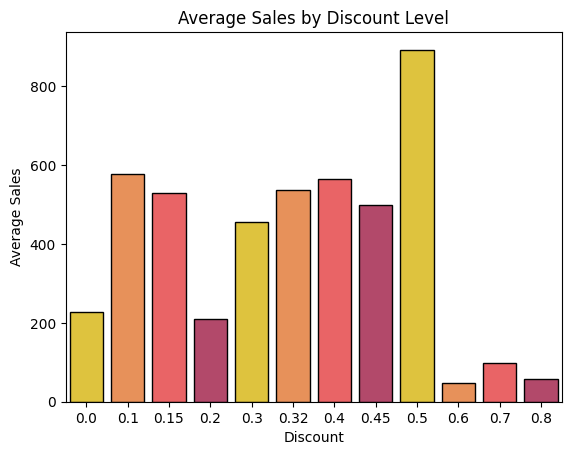

In [17]:
# Calculate average sales by discount level
discount_impact = (
    df.groupby('Discount', as_index=False)['Sales'].mean().round(2)
)

agsunset_like = ["#f9d423","#ff8c42","#ff4e50","#c33764"]

# Create bar chart using seaborn
sns.barplot(discount_impact, x='Discount', y='Sales', palette=agsunset_like, edgecolor='black')
plt.title('Average Sales by Discount Level')
plt.xlabel('Discount')
plt.ylabel('Average Sales')
plt.show()

In [23]:
# Scatter plot: Sales vs Discount
px.scatter(df, x='Discount', y='Sales', title='Sales Distribution by Discount Offered', color='Discount', color_continuous_scale='Agsunset',
           width=1200, height=800, template='plotly_white',
           labels={'Discount':'Discount Offered', 'Sales':'Sales Amount'})

## 10. Efficiency Metric: Profit Margin Analysis

Profit margin is the ultimate measure of operational efficiency. It tells us how many cents of profit we keep for every dollar of sales.

In [24]:
# Calculate profit margin percentage
df['Profit Margin'] = (df['Profit'] / df['Sales']) * 100

# Calculate average profit margin by category
profit_margin_by_category = (
    df.groupby('Category', as_index=False)['Profit Margin'].mean().round(2)
    .sort_values('Profit Margin', ascending=True)
)

# Create horizontal bar chart
fig = px.bar(
    profit_margin_by_category, x='Profit Margin', y='Category', orientation='h',
    title='Average Profit Margin by Category', color='Profit Margin', color_continuous_scale='agsunset'
)
fig.update_layout(width=900, height=400, xaxis_title='Profit Margin (%)', yaxis_title='Category')
fig.update_traces(text=profit_margin_by_category['Profit Margin'], textposition='outside')
fig.show()

## 11. Sub-Category Demand Analysis

Identifying the most demanded sub-categories by quantity.

In [32]:
# Calculate total quantity by sub-category
highest_demand_by_sub_category = (
    df.groupby('Sub-Category', as_index=False)['Quantity']
    .sum().sort_values('Quantity', ascending=True).head(10)
)

# Create horizontal bar chart
px.bar(highest_demand_by_sub_category, x='Quantity', y='Sub-Category', color='Quantity', color_continuous_scale='Agsunset',
       orientation='h', title='Top 10 Sub-Categories by Demand (Quantity)', template='plotly_white'
)

## 🏁 Final Business Recommendations

Based on the data-driven insights above, we recommend the following strategic actions:

### 1. 🚀 Growth Opportunities
- **Double Down on Technology**: As the highest margin category, increasing the sales mix of Tech products will disproportionately boost overall company profit.
- **Regional Expansion**: Focus marketing spend on the top-performing regions identified in Section 8 to capitalize on existing momentum.

### 2. 🛠️ Operational Improvements
- **Review Discount Thresholds**: The data suggests that high discounts (above 20%) may be eroding profit without a sufficient 'volume lift'. Consider a more conservative discounting policy.
- **Furniture Logistics**: Investigate the cost drivers in the Furniture category. High sales but lower relative profit suggests shipping or return costs might be an issue.

### 3. 📦 Inventory Management
- **Stock the 'Stars'**: Ensure the Top 15 products identified in Section 5 never go out of stock, as they are the primary engines of revenue.

---